# Support Vector Regression (SVR)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the libraries

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Importing the dataset

In [3]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
y = y.reshape(-1,1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

# First Transformation i.e. Dimensional Anaylsis 

In [5]:
from sklearn.preprocessing import StandardScaler as Sscl
Feature_Scale_x = Sscl()
Feature_Scale_y = Sscl()
x = Feature_Scale_x.fit_transform(x)
y = Feature_Scale_y.fit_transform(y)

In [6]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [7]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

# We will be using different feature scaling for y or dependent variable

## Feature Scaling

In [8]:
from sklearn.svm import SVR as svr
Support_Regressor = svr(kernel='rbf')
Support_Regressor.fit(x, y)

C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Training the SVR model on the whole dataset

In [9]:
pred=Support_Regressor.predict(Feature_Scale_x.transform([[6.5]]))
Feature_Scale_y.inverse_transform(pred)

array([170370.0204065])

## Inverse Transfrom for bringing back the y_predection

In [10]:
pred=Support_Regressor.predict(Feature_Scale_x.transform([[6.25]]))
Feature_Scale_y.inverse_transform(pred)

array([156355.26856577])

## Predicting a new result

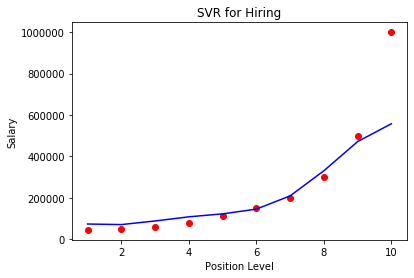

In [12]:
plt.scatter(Feature_Scale_x.inverse_transform(x),
            Feature_Scale_y.inverse_transform(y),
            color='r')
plt.plot(Feature_Scale_x.inverse_transform(x),
         Feature_Scale_y.inverse_transform(
             Support_Regressor.predict(x)),
         color='b')
plt.title('SVR for Hiring')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results

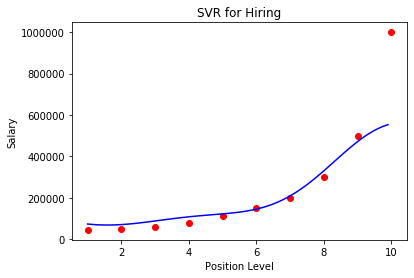

In [18]:
X_grid = np.arange(min(Feature_Scale_x.inverse_transform(x)),
                   max(Feature_Scale_x.inverse_transform(x)),
                   0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(Feature_Scale_x.inverse_transform(x),
            Feature_Scale_y.inverse_transform(y),
            color='r')
plt.plot(X_grid,
            Feature_Scale_y.inverse_transform(
                Support_Regressor.predict(
                    Feature_Scale_x.transform(X_grid))),
         color='b')
plt.title('SVR for Hiring')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

## SVR do not care a shit about outliers